In [1]:
import imutils
import cv2

In [2]:
img = cv2.imread('C:/Users/Hp/Downloads/image.jpg')

In [3]:
img.shape

(384, 600, 3)

In [4]:
window_name = 'img'

In [5]:
cv2.imshow(window_name, img) 
cv2.waitKey(0) 

-1

In [6]:
import matplotlib.pyplot as plt

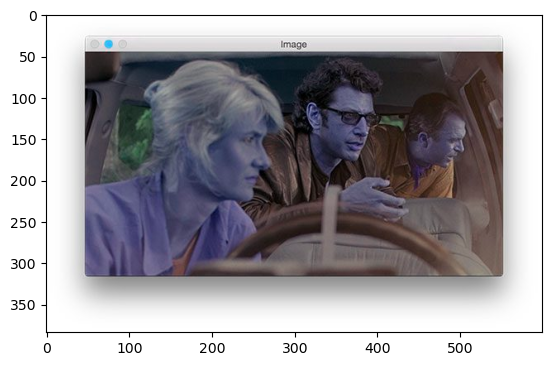

In [7]:
plt.imshow(img)

In [8]:
# Resizing Image

# inter_area   - Shrinking Image
# inter_cubic  - Slow in Shrinking
# inter_linear - Zooming is required(default method)

In [9]:
half = cv2.resize(img,(0,0), fx = 0.1, fy=0.1)

In [10]:
bigger = cv2.resize(img,(1050,1610))

In [11]:
stretch = cv2.resize(img,(780,540), interpolation=cv2.INTER_LINEAR)

In [12]:
titles = ['original','half','bigger','stretch']

images = [img,half,bigger,stretch]

count = 4

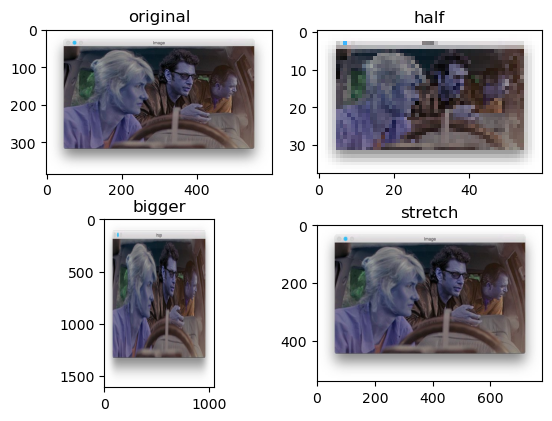

In [13]:
for i in range(count):
    plt.subplot(2,2,i+1)
    plt.title(titles[i])
    plt.imshow(images[i])
plt.show()

In [14]:
# Blurring the image

# Gaussian Blur  - Using Gaussian Kernel
# Median Blur    - Non Linear Blurring technique often used to remove noise
# Bilateral Blur - non linear, edge preserving and noise reducing smoothing filter

In [18]:
guassian = cv2.GaussianBlur(img, (7,7),0)

cv2.imshow("Gaussian Blur",guassian)

cv2.waitKey(0)

-1

In [17]:
median = cv2.medianBlur(img, 5)

cv2.imshow("Median Blur",median)

cv2.waitKey(0)

-1

In [19]:
bilateral = cv2.bilateralFilter(img, 9,75, 75)

cv2.imshow("Bilateral Blur",bilateral)

cv2.waitKey(0)

-1

In [20]:
titles = ['original','guassian','median','bilateral']

images = [img,guassian,median,bilateral]

count = 4

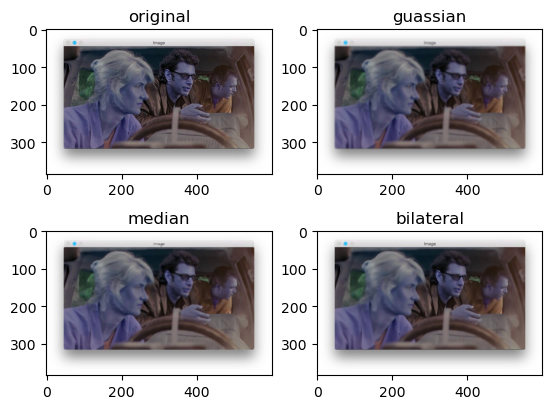

In [21]:
for i in range(count):
    plt.subplot(2,2,i+1)
    plt.title(titles[i])
    plt.imshow(images[i])
plt.show()

In [22]:
# Rotation of Image

center = (img.shape[1]//2, img.shape[0]//2)
angle  = 45
scale  = 1

In [23]:
rotation_matrix = cv2.getRotationMatrix2D(center,angle,scale)

In [24]:
rotation_img = cv2.warpAffine(img,rotation_matrix,(img.shape[1],img.shape[0]))

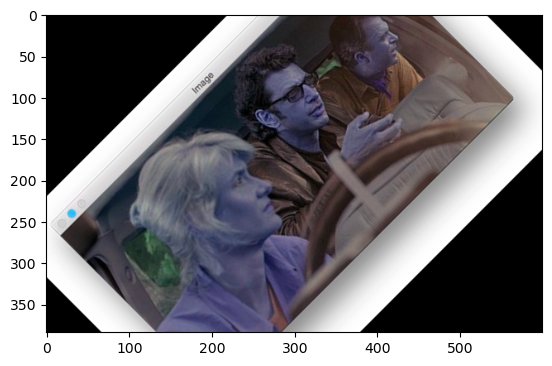

In [25]:
plt.imshow(rotation_img)

In [26]:
# Normalization of Image using Min Max Scaler

b,g,r = cv2.split(img)

In [30]:
min_value = 0
max_value = 1
norm_type = cv2.NORM_MINMAX

In [31]:
b_norm = cv2.normalize(b.astype('float'),None,min_value,max_value,norm_type)

g_norm = cv2.normalize(g.astype('float'),None,min_value,max_value,norm_type)

r_norm = cv2.normalize(r.astype('float'),None,min_value,max_value,norm_type)

In [32]:
img_normalize = cv2.merge((b_norm,g_norm,r_norm))

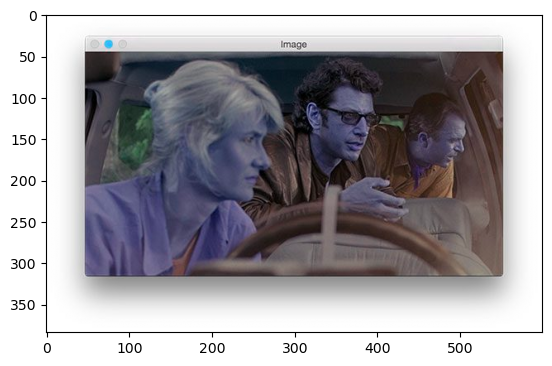

In [34]:
plt.imshow(img_normalize)

In [35]:
# Edge Detection - Sharp edges of image and important in object detection/localization
# Most popular algorithm is Canny Edge Detection.
# Steps involved in Canny Edge Detection are
# 1) Gaussian Smoothing - Smoothing of image using Gaussian Filter for noise removal
# 2) Gradient Calculation - Gradient of image is calcualted using Sobel Operator
# 3) Non-Maximum Suppression - removes spurious or irrelevant edges
# 4) Hysteresis Thresholding - detects strong and weak edges from gradient image.

In [57]:
edges = cv2.Canny(img,threshold1 = 50, threshold2 = 110)

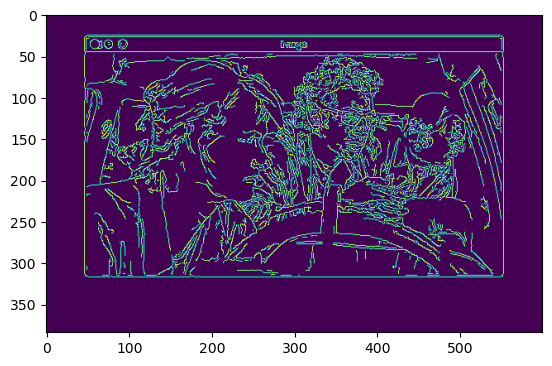

In [58]:
plt.imshow(edges)

In [59]:
# Morphological Image Processing uses geometry of objects in an image for processing
# Eliminates noise, seperate objects and detect edges.
# 2 morphological operations are
# Dialation - expands the boundaries of objects in image
# Erosion - shrinks the boundaries of objects in image

In [60]:
import numpy as np

In [61]:
# Structuring kernal or filter
kernel = np.ones((3,3),np.uint8)

In [67]:
img2 = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [68]:
dialated = cv2.dilate(img2,kernel,iterations=2)

In [69]:
eroded = cv2.erode(img2,kernel,iterations=2)

In [70]:
# Perform opening(erosion followed by dilation)
openinings = cv2.morphologyEx(img2,cv2.MORPH_OPEN,kernel)

In [71]:
# Perform opening(dilation followed by erosion)
closing = cv2.morphologyEx(img2,cv2.MORPH_CLOSE,kernel)

In [72]:
titles = ['original', 'dialated', 'eroded', 'openinings','closing']
images = [img2,dialated,eroded,openinings,closing]
counts = 5

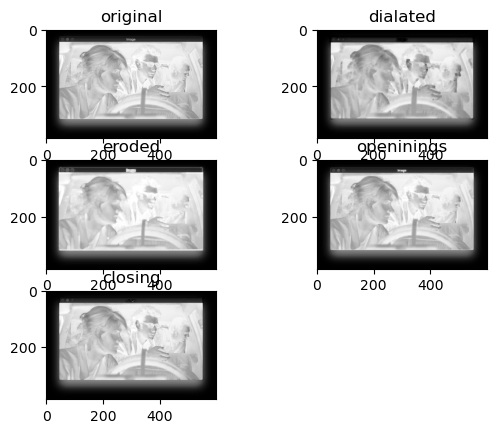

In [74]:
for i in range(counts):
    plt.subplot(3,2,i+1)
    plt.title(titles[i])
    plt.imshow(images[i],cmap="Greys")
plt.show()

In [76]:
# Accessing specific regions of image

roi = img[60:160,320:420]
cv2.imshow("ROI",roi)
cv2.waitKey(0)

-1

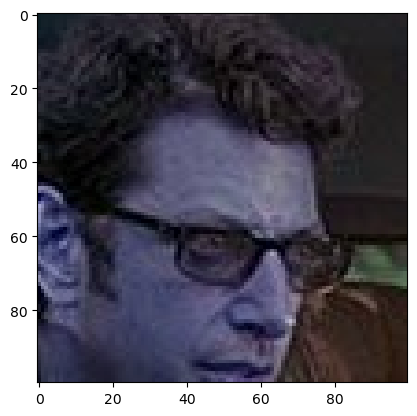

In [77]:
plt.imshow(roi)